## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Feb 19 03:07:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/112.6 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [4]:
!yolo task=detect mode=predict model=yolo11l-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 53.5M/53.5M [00:00<00:00, 216MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-seg summary (fused): 491 layers, 27,646,272 parameters, 0 gradients, 142.2 GFLOPs

100% 104k/104k [00:00<00:00, 61.1MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 71.9ms
Speed: 12.0ms preprocess, 71.9ms inference, 386.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

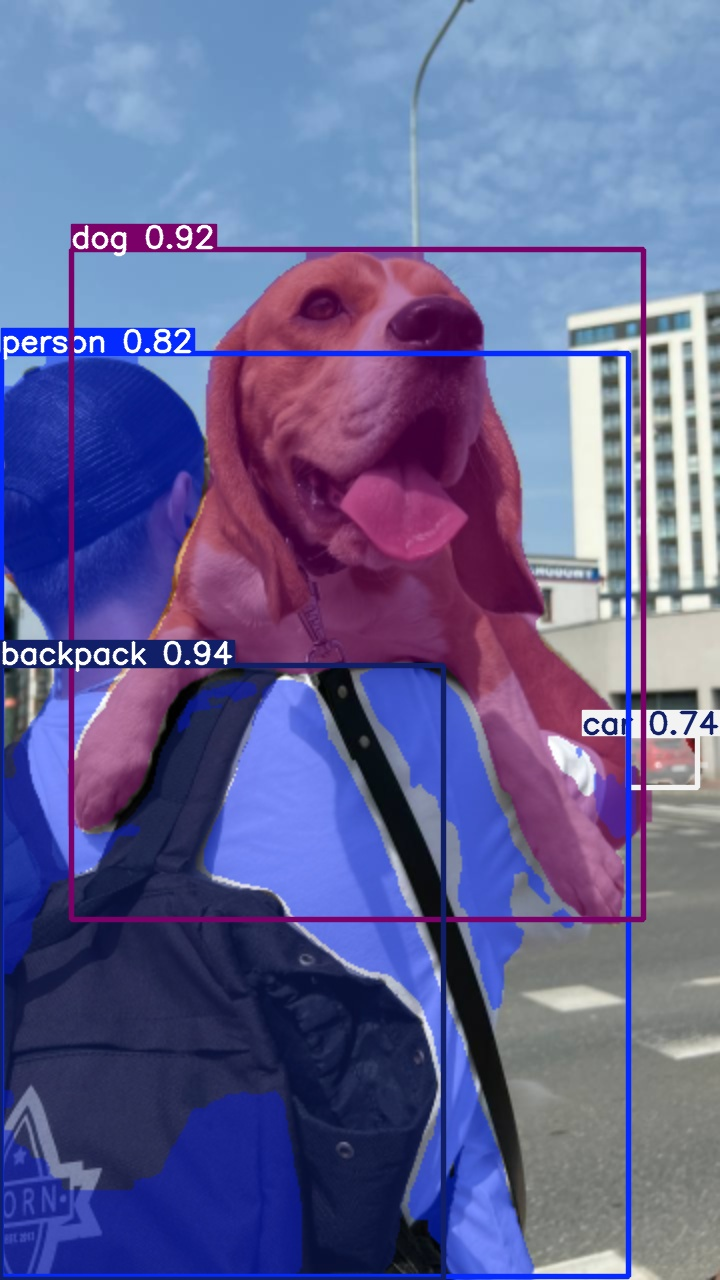

In [15]:
from IPython.display import Image as IPyImage

# Update the filename path to reflect the correct location for segmentation results
IPyImage(filename=f'{HOME}/runs/segment/predict/dog.jpg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [16]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11l-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 1 person, 1 car, 1 dog, 1 backpack, 76.5ms
Speed: 3.5ms preprocess, 76.5ms inference, 179.2ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [17]:
result.boxes.xyxy

tensor([[0.0000e+00, 6.6552e+02, 4.4326e+02, 1.2796e+03],
        [7.1101e+01, 2.4920e+02, 6.4366e+02, 9.1943e+02],
        [1.1703e+00, 3.5331e+02, 6.2878e+02, 1.2769e+03],
        [6.2872e+02, 7.3547e+02, 6.9789e+02, 7.8725e+02]], device='cuda:0')

In [18]:
result.boxes.conf

tensor([0.9365, 0.9156, 0.8151, 0.7367], device='cuda:0')

In [19]:
result.boxes.cls

tensor([24., 16.,  0.,  2.], device='cuda:0')

In [20]:
result.masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [21]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

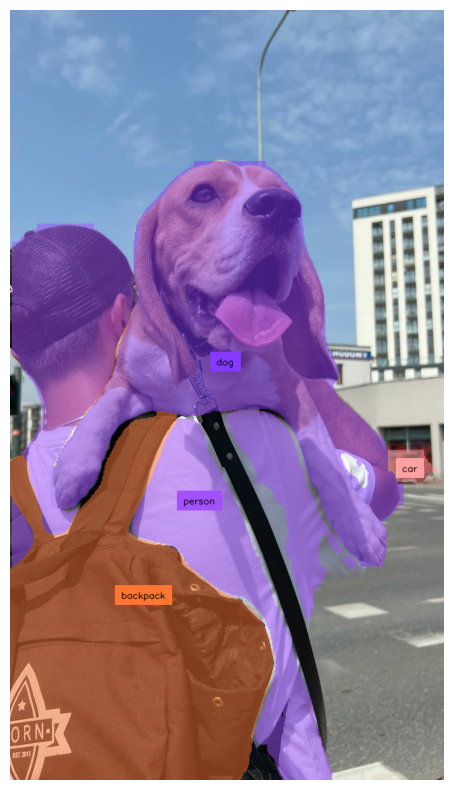

In [22]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [23]:
!mkdir -p datasets
%cd datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("inasinas")
project = workspace.project("plant_diseses_segmentation")

# Get the latest version instead of specifying version 3
latest_version = project.versions()[-1]
dataset = latest_version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to plant_diseses_segmentation-1 in yolov11:: 100%|██████████| 246/246 [00:00<00:00, 6387.07it/s]


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Custom Training

In [25]:
!pwd

/content/datasets


In [30]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=150 imgsz=640 plots=True

/content
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
New https://pypi.org/project/ultralytics/8.3.76 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/plant_diseses_segmentation-1/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=Fa

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [31]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch280.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch281.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch282.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch2.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       weights
events.out.tfevents.1739935143.401c24752e67.5462.0  train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg


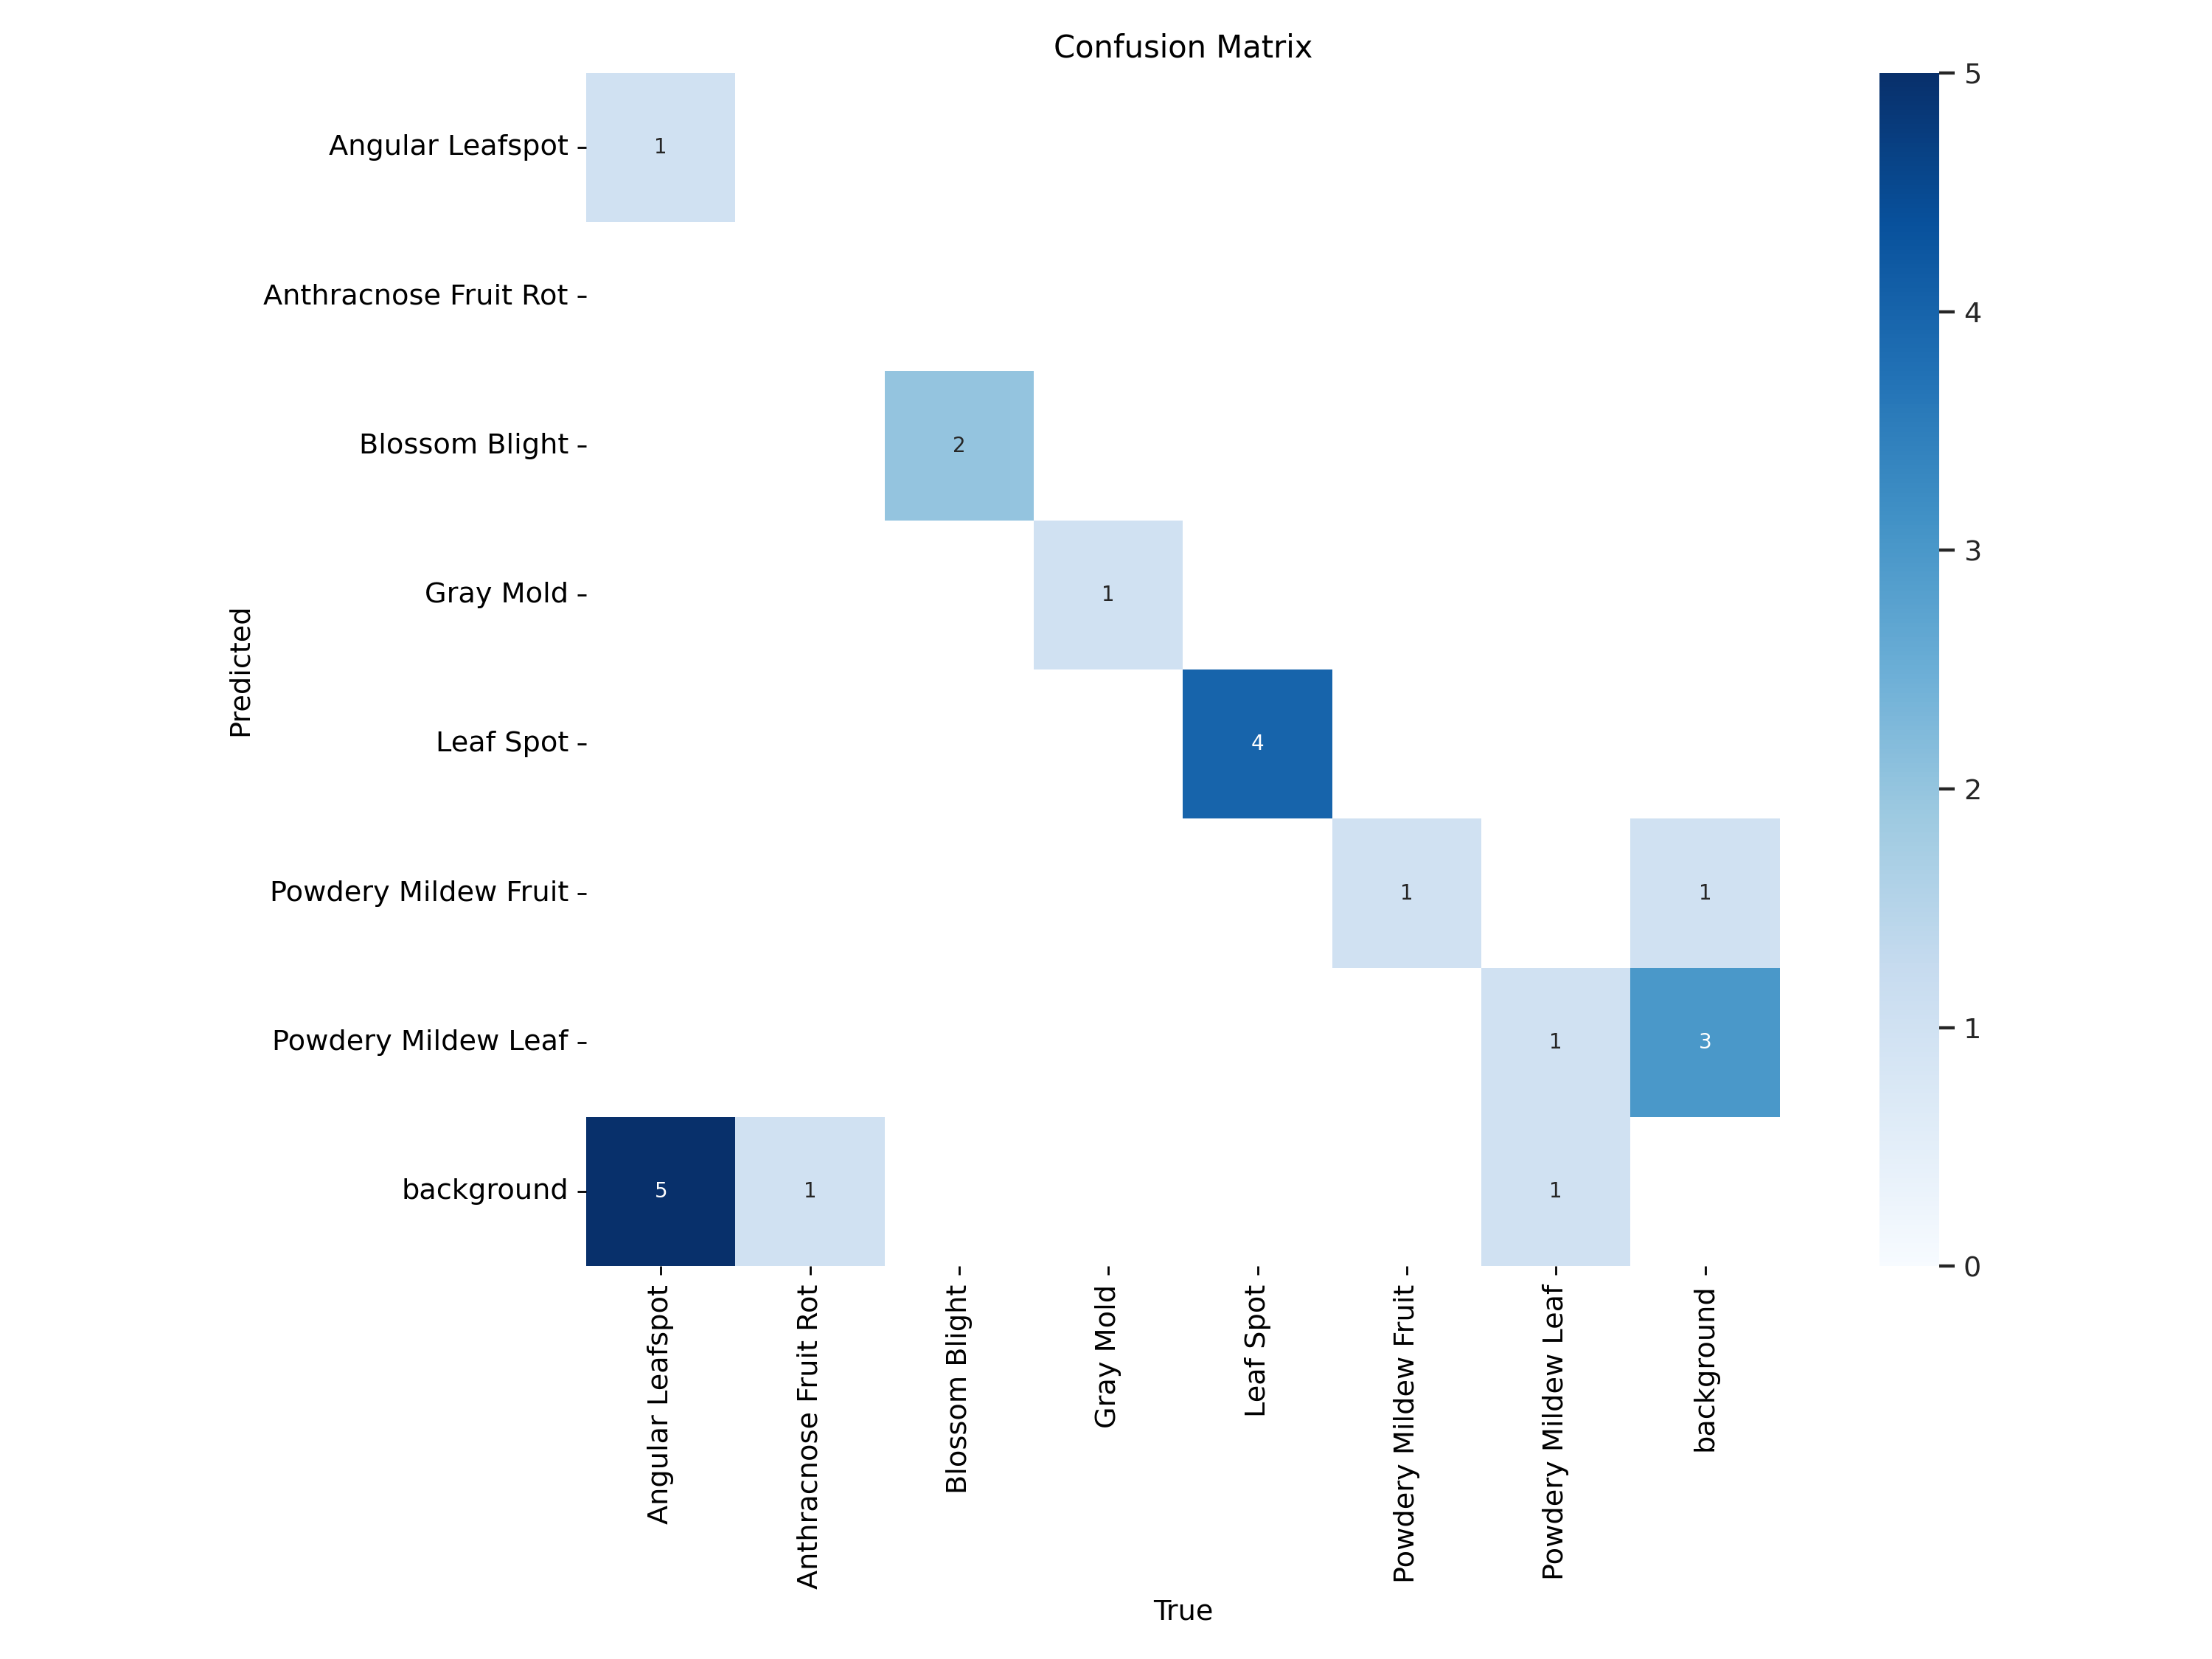

In [32]:
import os
HOME = os.getcwd()

from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

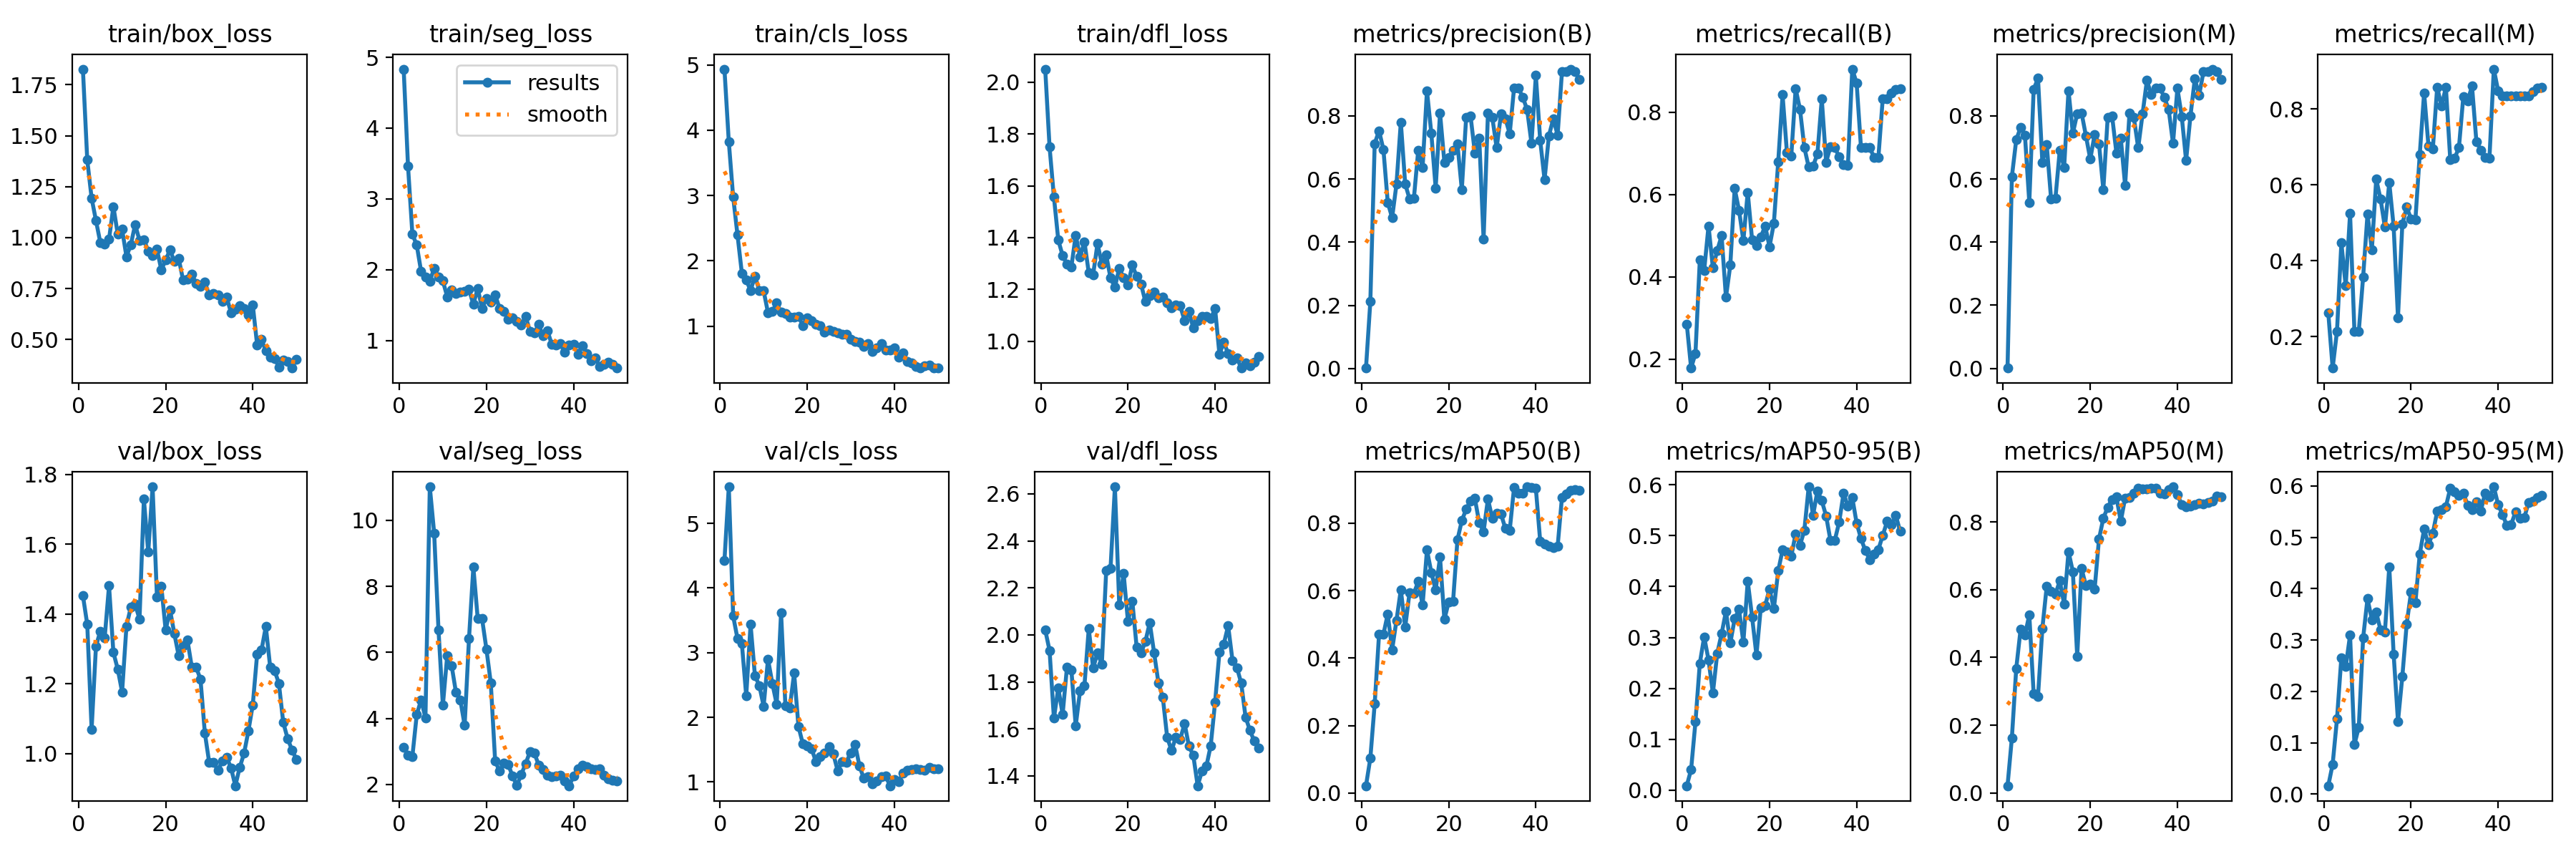

In [33]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

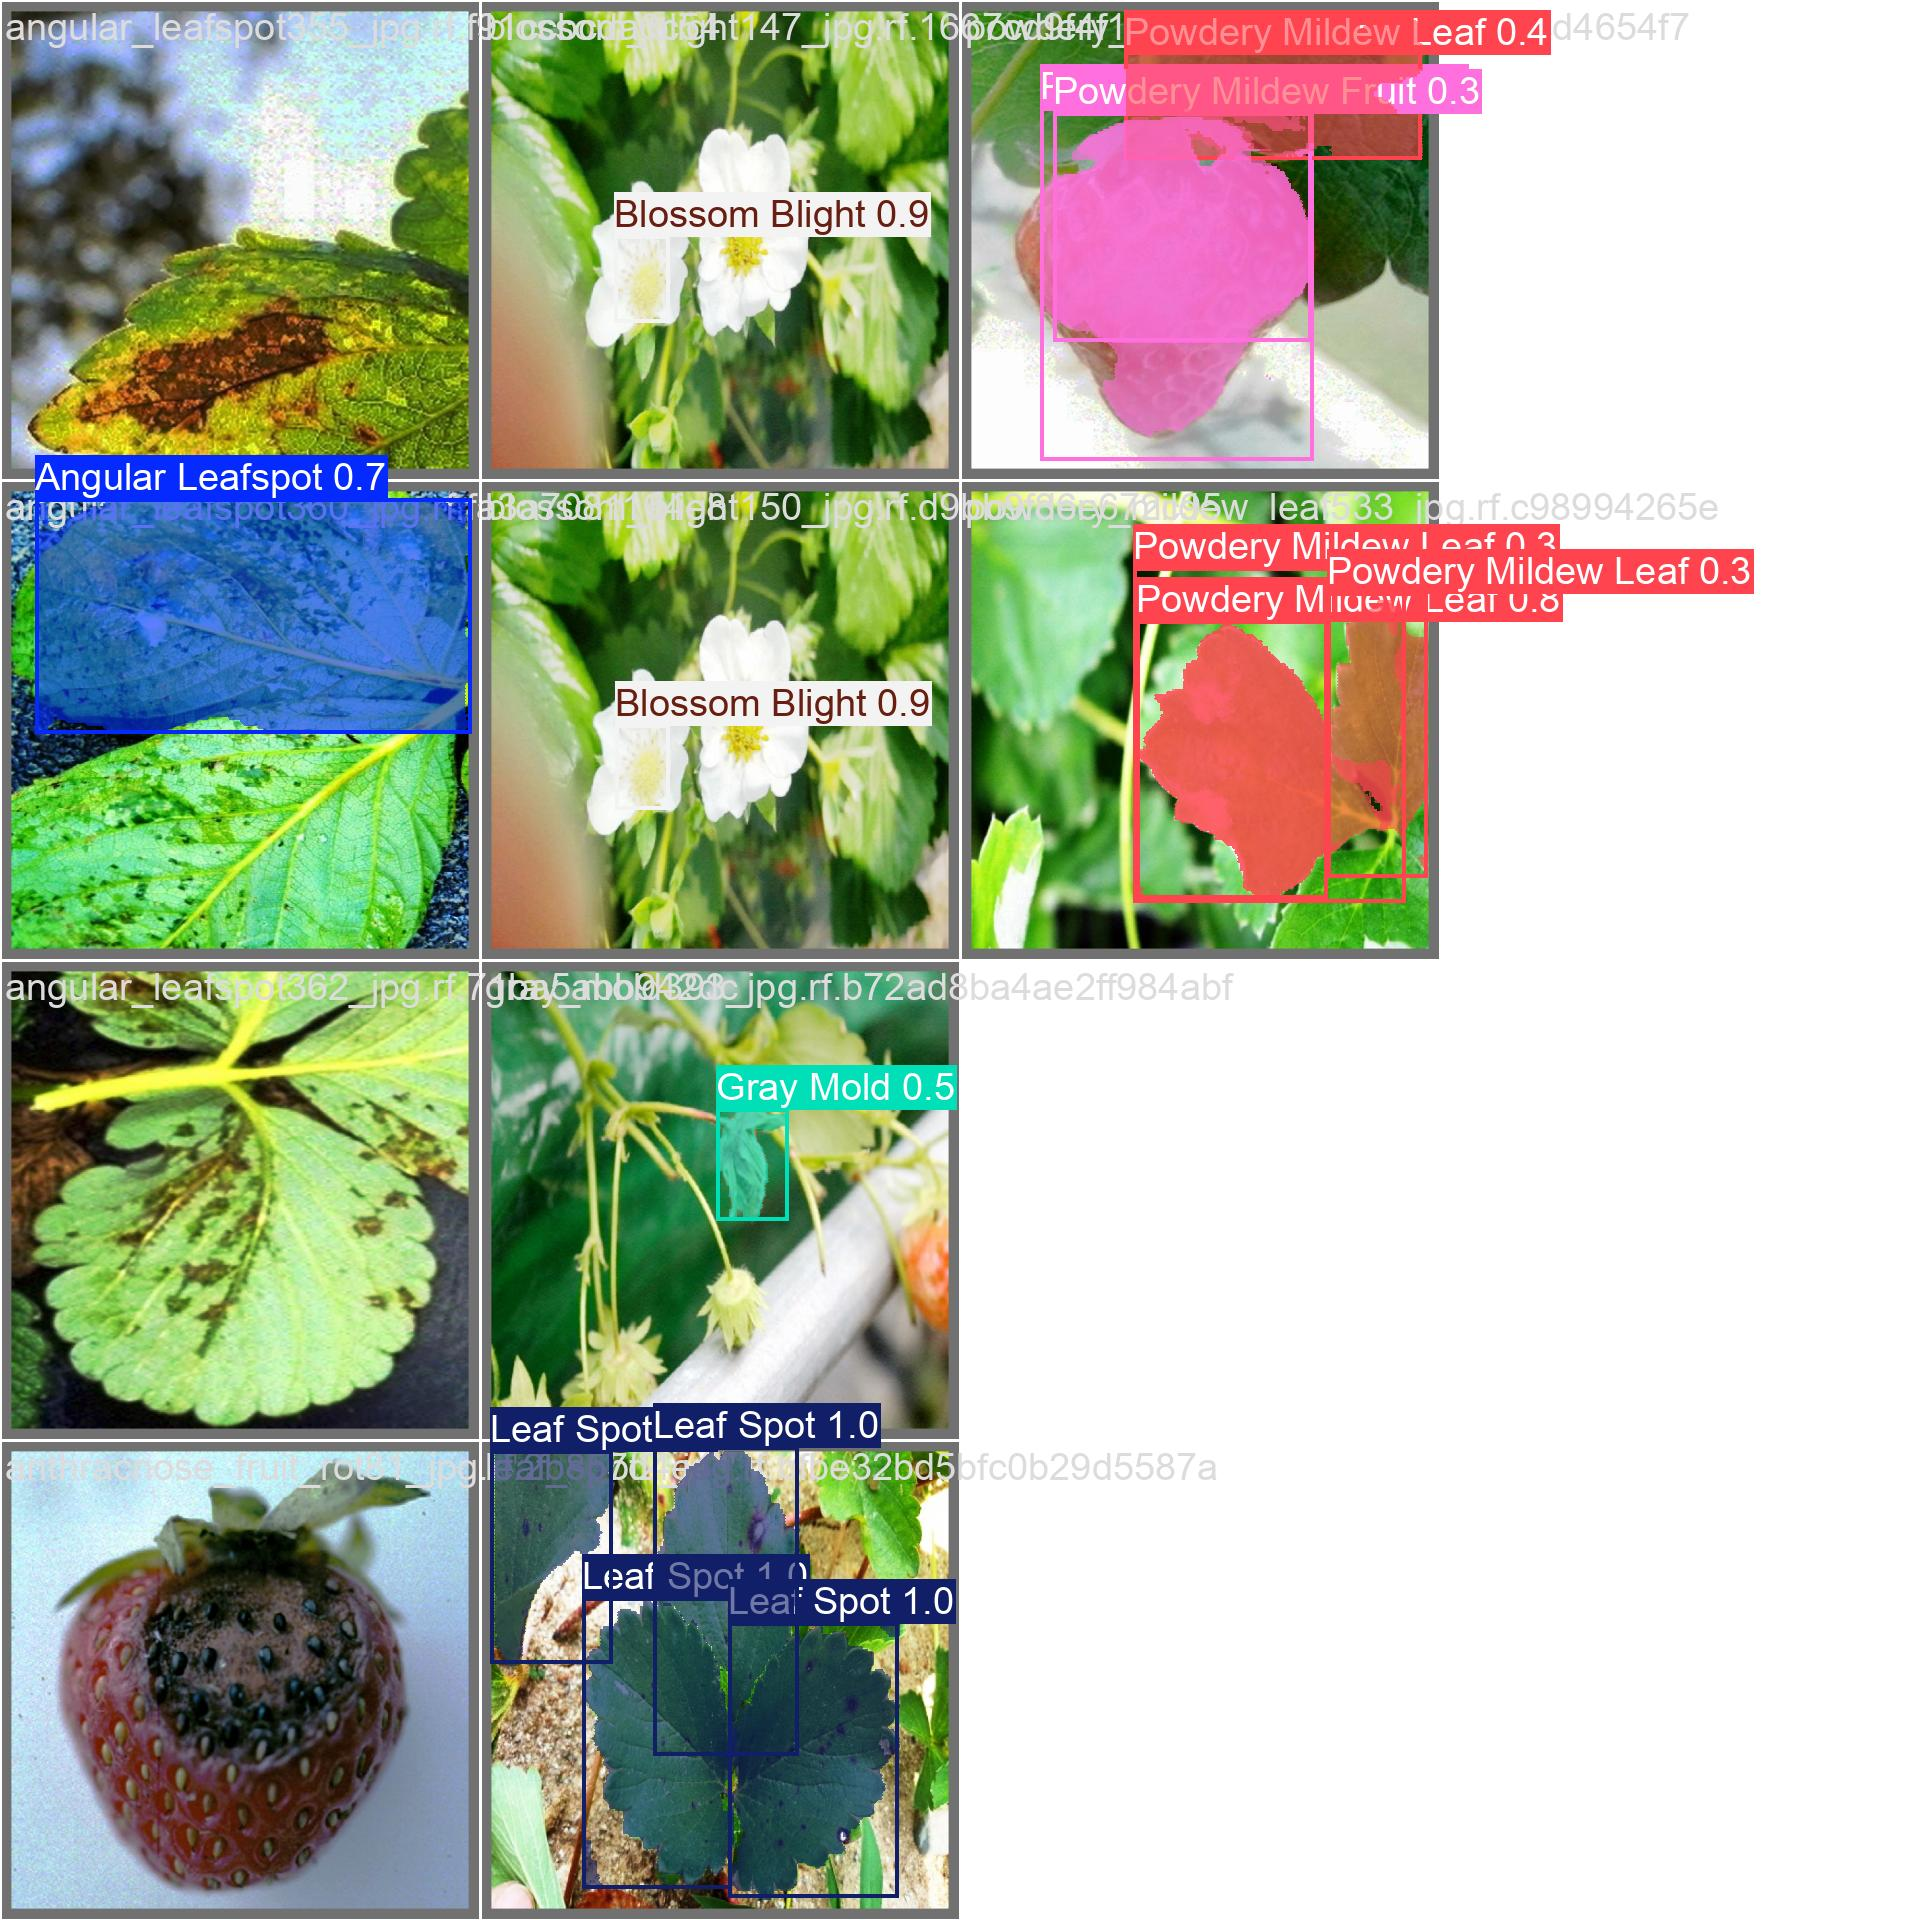

In [34]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with custom model

In [35]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 265 layers, 10,069,525 parameters, 0 gradients, 35.3 GFLOPs

image 1/5 /content/datasets/plant_diseses_segmentation-1/test/images/angular_leafspot353_jpg.rf.f73c0b29ce50bae25ca08a8ebfe77ba0.jpg: 640x640 (no detections), 20.2ms
image 2/5 /content/datasets/plant_diseses_segmentation-1/test/images/angular_leafspot359_jpg.rf.8f1e42677109f9f4e21a75bf54fe7ce6.jpg: 640x640 1 Angular Leafspot, 20.3ms
image 3/5 /content/datasets/plant_diseses_segmentation-1/test/images/gray_mold397_jpg.rf.8c006c91c42a519b0c9a88000f1b3345.jpg: 640x640 1 Gray Mold, 20.3ms
image 4/5 /content/datasets/plant_diseses_segmentation-1/test/images/powdery_mildew_fruit123_jpg.rf.91dc5db13df28d3cef9eaa66b81fdaa0.jpg: 640x640 3 Anthracnose Fruit Rots, 1 Powdery Mildew Fruit, 2

**NOTE:** Let's take a look at few results.

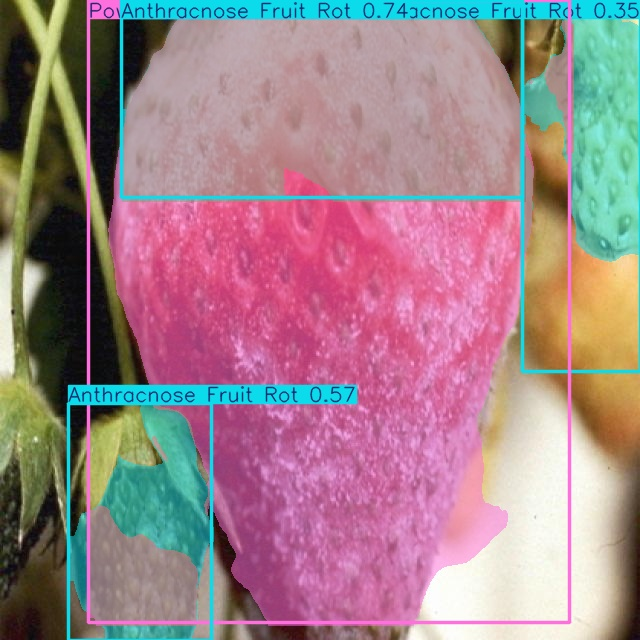

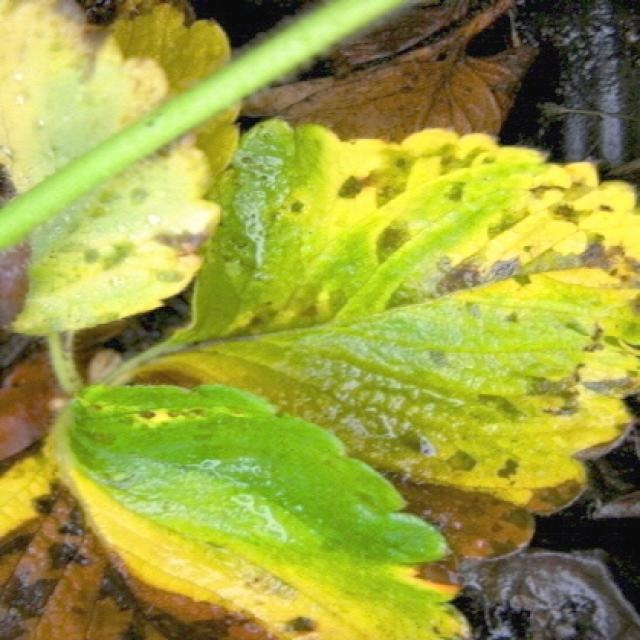

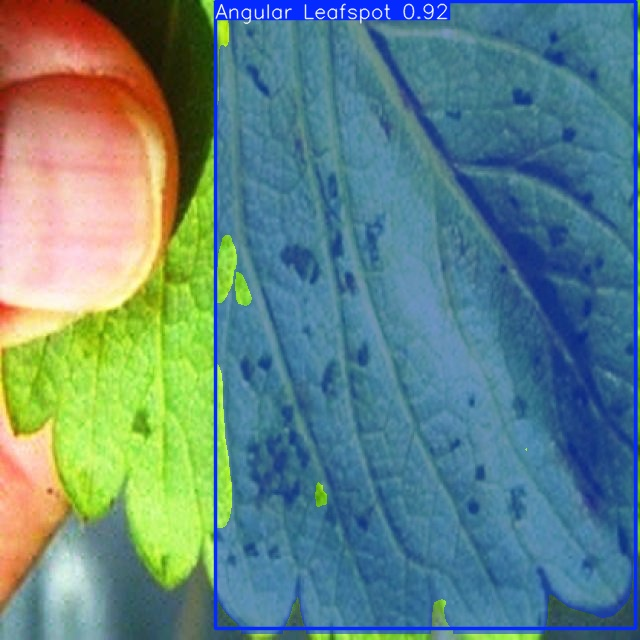

In [37]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [38]:
!ls runs/segment/predict

dog.jpg


In [39]:
import os
print(os.listdir(f'{HOME}/runs/segment'))

['predict2', 'predict', 'train2', 'train3', 'train']


In [40]:
print(os.listdir(f'{HOME}/runs/segment/predict/'))

['dog.jpg']


In [41]:
import os
HOME = os.getcwd()

In [42]:
latest_folders = glob.glob(f'{HOME}/runs/segment/predict/')
if latest_folders:
    latest_folder = max(latest_folders, key=os.path.getmtime)
    for img in glob.glob(f'{latest_folder}/*.[jJ][pP][gG]')[17:18]:
        print(img)
        display(IPyImage(filename=img, width=600))
        print("\n")
else:
    print("No files found in the specified directory.")

In [43]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict/'), key=os.path.getmtime)

for img in glob.glob(f'{latest_folder}/*.jpg')[17:18]:
    print(img)
    display(IPyImage(filename=img, width=600))
    print("\n")

In [47]:
'content/datasets/Pelvis-AP-X-ray-3/test/images/45_jpg.rf.ce678a6abea6d14974aa610f0cd8c74a.jpg()'

'content/datasets/Pelvis-AP-X-ray-3/test/images/45_jpg.rf.ce678a6abea6d14974aa610f0cd8c74a.jpg()'

In [57]:
import os
from PIL import Image

HOME = os.getcwd()
dataset_location = 'content/datasets/Pelvis-AP-X-ray-3/test/images/'# Replace with your actual dataset location if different

# Construct the full image path - Removed extra 'test/images'
image_path = os.path.join(dataset_location, '45_jpg.rf.ce678a6abea6d14974aa610f0cd8c74a.jpg')  # Fixed the file name

# Check if the file exists before trying to open it
if os.path.exists(image_path):
    image = Image.open(image_path)
else:
    print(f"Error: File not found at {image_path}")
    # Handle the error appropriately, e.g., exit the script or try a different image

Error: File not found at content/datasets/Pelvis-AP-X-ray-3/test/images/45_jpg.rf.ce678a6abea6d14974aa610f0cd8c74a.jpg


In [58]:
import os

# List all files and directories in the root directory
for item in os.listdir('/content'):
    print(item)

.config
runs
yolo11s-seg.pt
datasets
yolo11l-seg.pt
dog.jpeg
drive
yolo11n.pt


In [59]:
for item in os.listdir('/content/datasets'):
    print(item)

plant_diseses_segmentation-1


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
from ultralytics import YOLO
from PIL import Image
import requests
import os

# Assuming 'HOME' is already defined and pointing to your project directory
model_path = os.path.join(HOME, 'runs', 'segment', 'train', 'weights', 'best.pt')

# Check if the file exists before trying to load it
if os.path.exists(model_path):
    model = YOLO(model_path)
else:
    print(f"Error: Model file not found at {model_path}")
    # Handle the error appropriately, e.g., exit the script or retrain the model

# ... rest of your code ...

In [63]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

In [64]:
# Rename classes
name_dictionary = {
    "SUORCIL": "SOURCIL",
    "SAKRO-ILIAK-EKLEM": "SACROILIAC-JOINT",
    "ILIAK": "ILIUM"
}
detections.data["class_name"] = [name_dictionary.get(class_name, class_name) for class_name in detections.data["class_name"]]

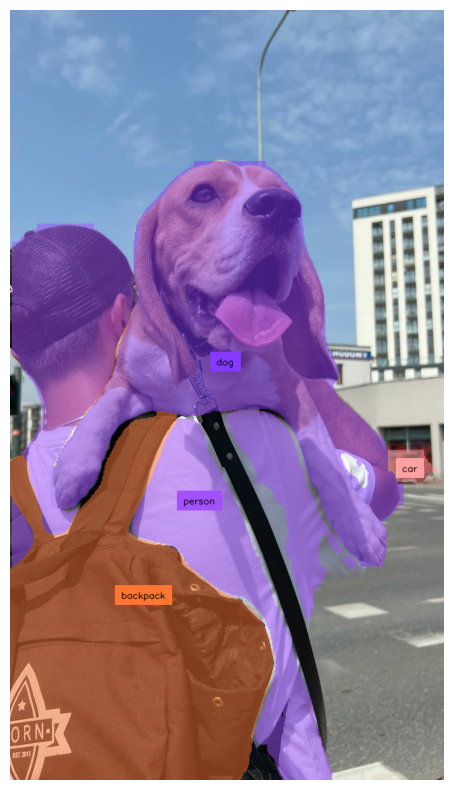

In [65]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
mask_annotator.annotate(annotated_image, detections=detections)
label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/segment/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [66]:
project.version(dataset.version).deploy(model_type="yolov11-seg", model_path=f"{HOME}/runs/segment/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [1]:
!pip install inference

Running inference on powdery_mildew_leaf534_jpg.rf.5587c945c9a51d5a63e8842b4624c0b4.jpg


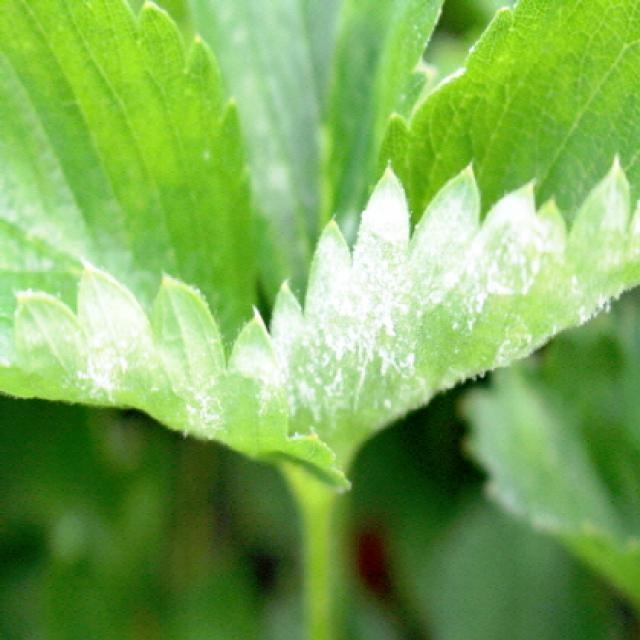

Running inference on angular_leafspot359_jpg.rf.8f1e42677109f9f4e21a75bf54fe7ce6.jpg


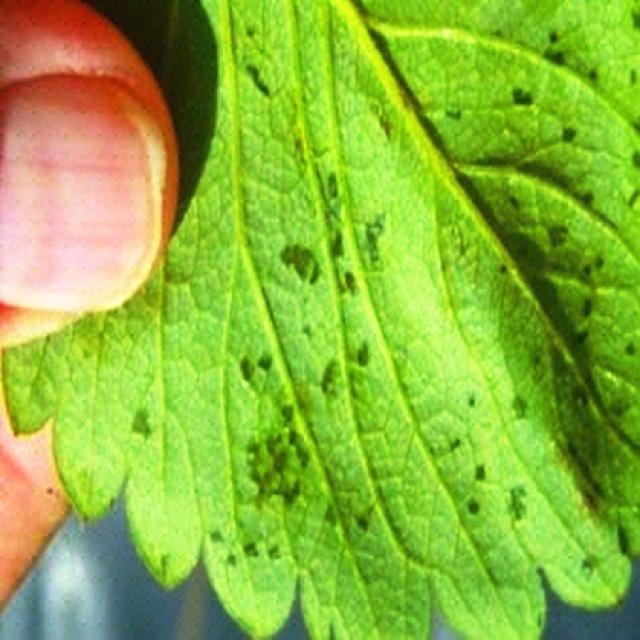

Running inference on angular_leafspot353_jpg.rf.f73c0b29ce50bae25ca08a8ebfe77ba0.jpg


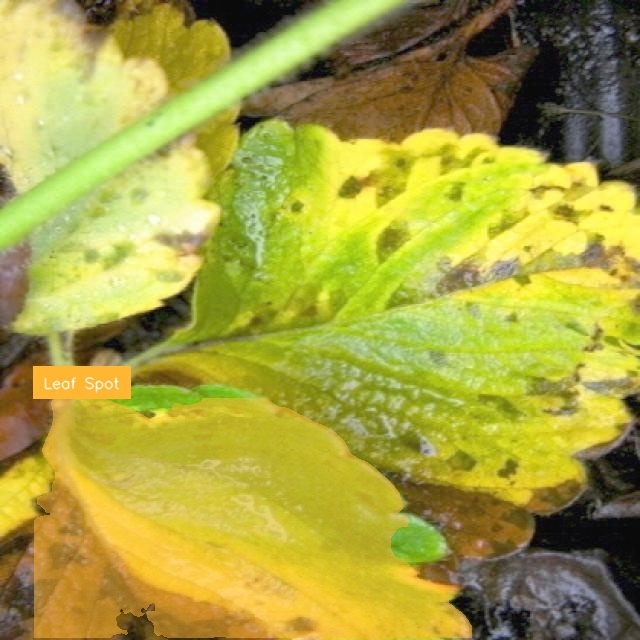

Running inference on gray_mold397_jpg.rf.8c006c91c42a519b0c9a88000f1b3345.jpg


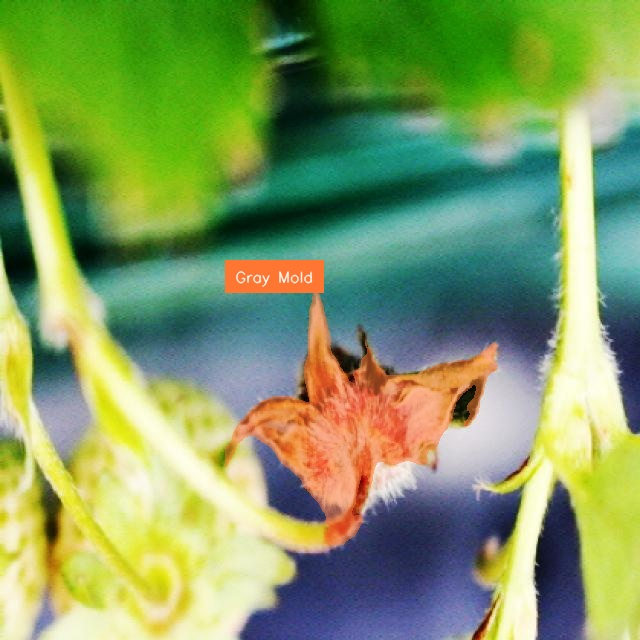

In [6]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    mask_annotator = sv.MaskAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = mask_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


loading Roboflow workspace...
loading Roboflow project...
Running inference on angular_leafspot353_jpg.rf.f73c0b29ce50bae25ca08a8ebfe77ba0.jpg


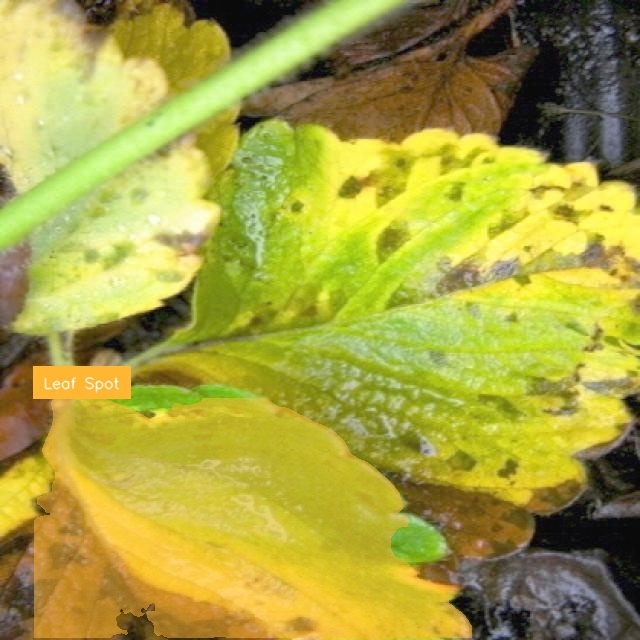

Running inference on powdery_mildew_fruit123_jpg.rf.91dc5db13df28d3cef9eaa66b81fdaa0.jpg


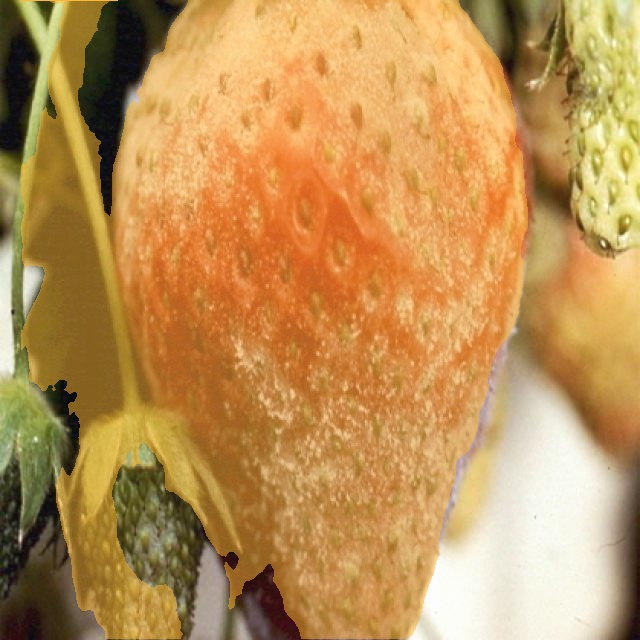

Running inference on powdery_mildew_leaf534_jpg.rf.5587c945c9a51d5a63e8842b4624c0b4.jpg


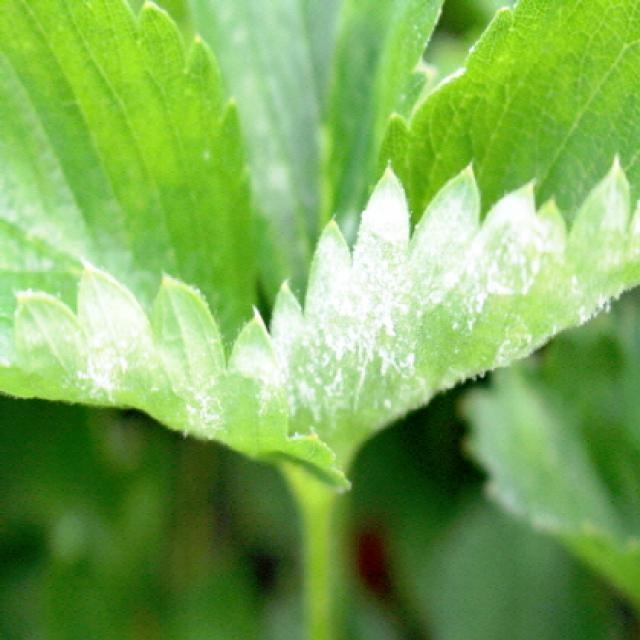

Running inference on angular_leafspot359_jpg.rf.8f1e42677109f9f4e21a75bf54fe7ce6.jpg


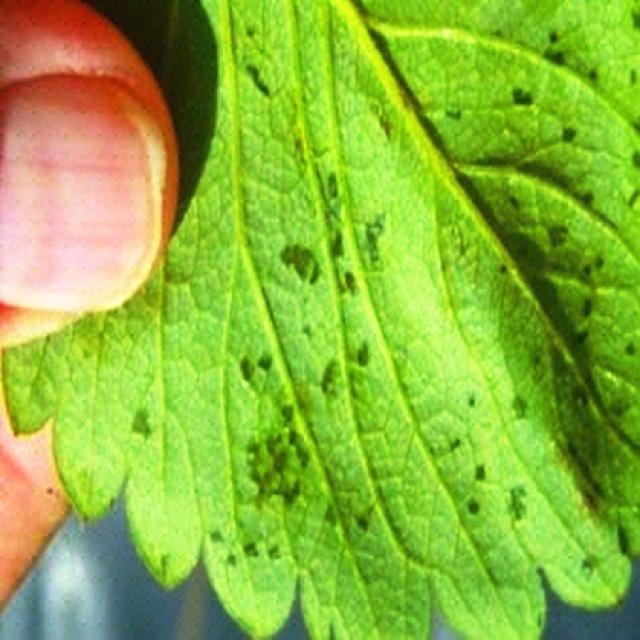

In [7]:
import os, random, cv2
import supervision as sv
import IPython
import inference
from google.colab import userdata
from roboflow import Roboflow

# You need to re-initialize the Roboflow object and get the project
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
workspace = rf.workspace("inasinas")  # Replace with your workspace name
project = workspace.project("plant_diseses_segmentation") # Replace with your project name
dataset = project.versions()[-1].download("yolov11")


model_id = project.id.split("/")[1] + "/" + dataset.version # Assuming 'dataset' is defined correctly
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    mask_annotator = sv.MaskAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = mask_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

loading Roboflow workspace...
loading Roboflow project...
Running inference on powdery_mildew_leaf534_jpg.rf.5587c945c9a51d5a63e8842b4624c0b4.jpg


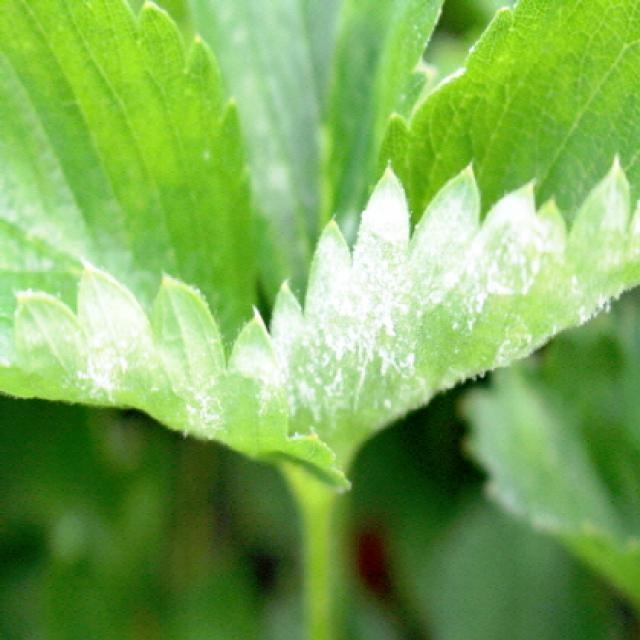

Running inference on angular_leafspot359_jpg.rf.8f1e42677109f9f4e21a75bf54fe7ce6.jpg


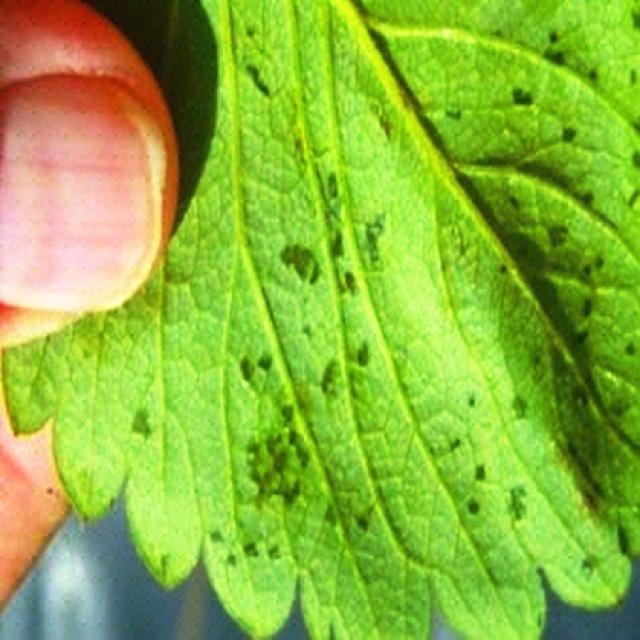

Running inference on powdery_mildew_fruit123_jpg.rf.91dc5db13df28d3cef9eaa66b81fdaa0.jpg


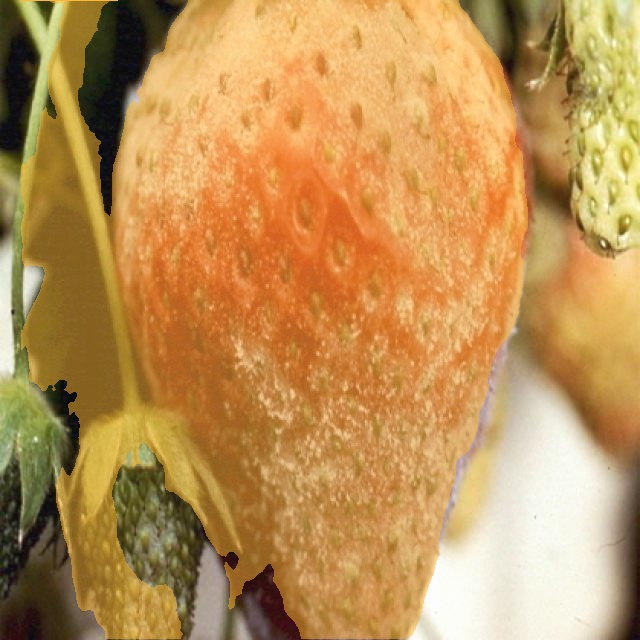

Running inference on gray_mold397_jpg.rf.8c006c91c42a519b0c9a88000f1b3345.jpg


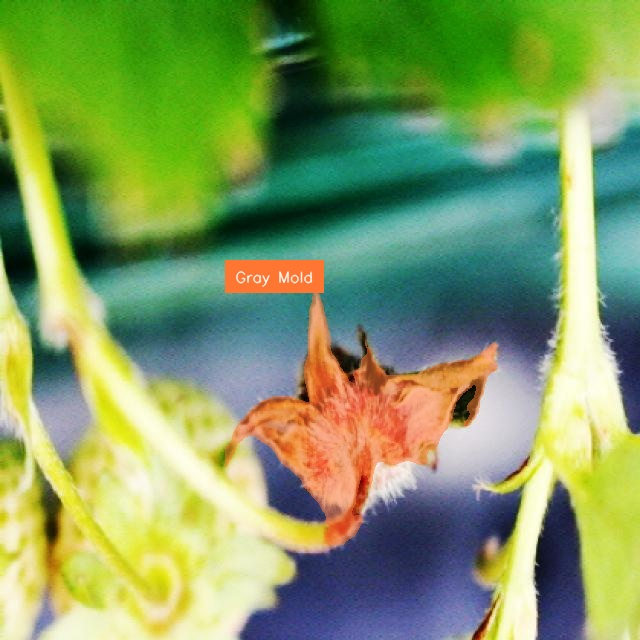

In [8]:
import os, random, cv2
import supervision as sv
import IPython
import inference
from google.colab import userdata
from roboflow import Roboflow

# You need to re-initialize the Roboflow object and get the project
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
workspace = rf.workspace("inasinas")  # Replace with your workspace name
project = workspace.project("plant_diseses_segmentation") # Replace with your project name
dataset = project.versions()[-1].download("yolov11")


model_id = project.id.split("/")[1] + "/" + dataset.version # Assuming 'dataset' is defined correctly
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    mask_annotator = sv.MaskAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = mask_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

loading Roboflow workspace...
loading Roboflow project...
Running inference on powdery_mildew_leaf534_jpg.rf.5587c945c9a51d5a63e8842b4624c0b4.jpg


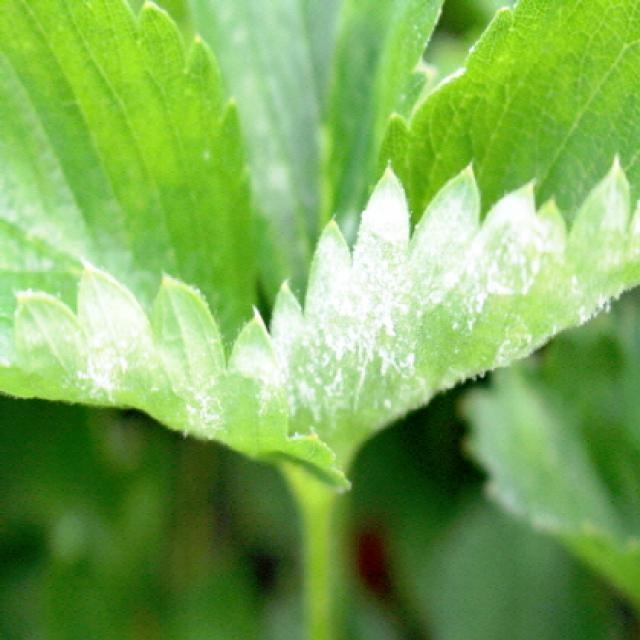

Running inference on gray_mold397_jpg.rf.8c006c91c42a519b0c9a88000f1b3345.jpg


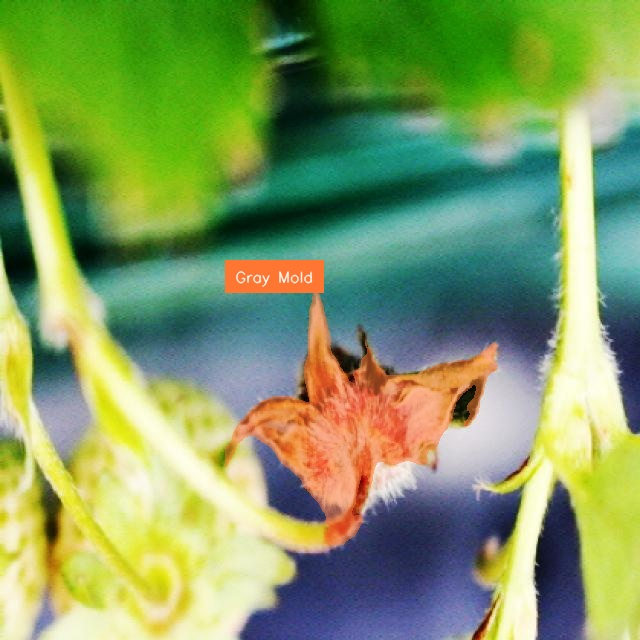

Running inference on angular_leafspot359_jpg.rf.8f1e42677109f9f4e21a75bf54fe7ce6.jpg


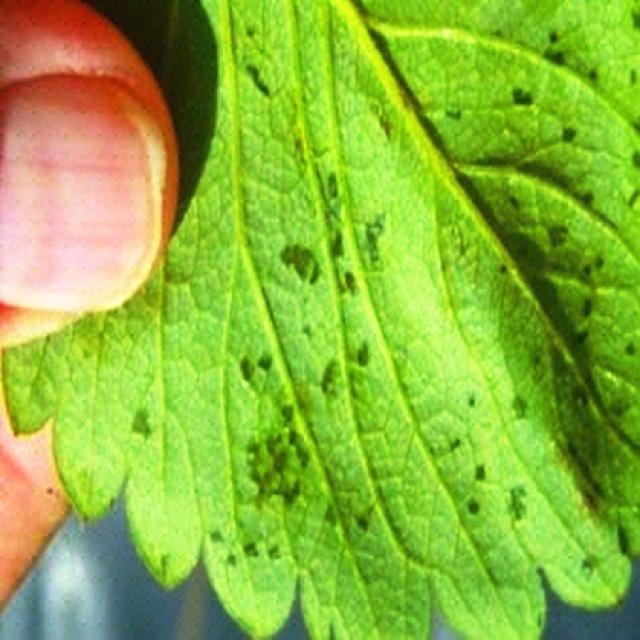

Running inference on angular_leafspot353_jpg.rf.f73c0b29ce50bae25ca08a8ebfe77ba0.jpg


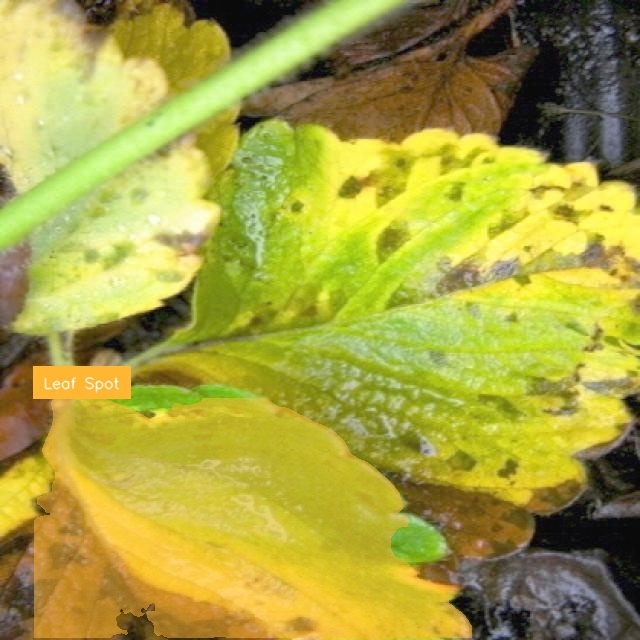

In [9]:
import os, random, cv2
import supervision as sv
import IPython
import inference
from google.colab import userdata
from roboflow import Roboflow

# You need to re-initialize the Roboflow object and get the project
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
workspace = rf.workspace("inasinas")  # Replace with your workspace name
project = workspace.project("plant_diseses_segmentation") # Replace with your project name
dataset = project.versions()[-1].download("yolov11")


model_id = project.id.split("/")[1] + "/" + dataset.version # Assuming 'dataset' is defined correctly
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    mask_annotator = sv.MaskAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = mask_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
#Use code with caution
#Sources
#Rate this answer
#Enter a prompt here


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.